# RX2: 

The  human  body comes  in  various  shapes, sizes,  and  temperatures.  For  this  project,  two data sets are used which contain various measurements of human bodies.

The  *normtemp*  data  setcontains  measurements  of  normal  body  temperature  for 130  healthy adults in the variable temperature. The variable gender records the gender of the subject, and hr the heart rate in beats per minute.

The *fat* data set contains many measurements of human bodies that can be done with a tape measure (circumference measurements), for instance the variable ```wrist``` contains measurements of wrist size in centimeters. Additionally, the variable ```body.fat``` contains body fat measurements.

Download the data sets from Canvas and issue the commands as below to read them into R. Don’t forget to set the appropriate working directory using ```setwd``` command before trying to read the datasets. After reading the data sets, you can view the variable names using ```summary(normtemp)``` and ```summary(fat)```. Attach them both so that the variable names are visible from the command line.

In [1]:
normtemp <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/normtemp.txt", header = TRUE, sep = "\t", dec = ".")
fat <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/fat.txt", header = TRUE, sep = "\t", dec = ".")
summary(normtemp)
summary(fat)
attach(normtemp)
attach(fat)

  temperature         gender          hr       
 Min.   : 96.30   Min.   :1.0   Min.   :57.00  
 1st Qu.: 97.80   1st Qu.:1.0   1st Qu.:69.00  
 Median : 98.30   Median :1.5   Median :74.00  
 Mean   : 98.25   Mean   :1.5   Mean   :73.76  
 3rd Qu.: 98.70   3rd Qu.:2.0   3rd Qu.:79.00  
 Max.   :100.80   Max.   :2.0   Max.   :89.00  

      case          fat.Brozek       fat.Siri        density     
 Min.   :  1.00   Min.   : 0.00   Min.   : 0.00   Min.   :0.995  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:12.47   1st Qu.:1.041  
 Median :126.50   Median :19.00   Median :19.20   Median :1.055  
 Mean   :126.50   Mean   :18.94   Mean   :19.15   Mean   :1.056  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:25.30   3rd Qu.:1.070  
 Max.   :252.00   Max.   :45.10   Max.   :47.50   Max.   :1.109  
      age            weight      unknown_measurement      BMI       
 Min.   :22.00   Min.   :118.5   Min.   :29.50       Min.   :18.10  
 1st Qu.:35.75   1st Qu.:159.0   1st Qu.:68.25       1st Qu.:23.10  
 Median :43.00   Median :176.5   Median :70.00       Median :25.05  
 Mean   :44.88   Mean   :178.9   Mean   :70.15       Mean   :25.44  
 3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25       3rd Qu.:27.32  
 Max.   :81.00   Max.   :363.1   Max.   :77.75       Max.   :48.90  
 fat.free.weight      neck           chest           ab

# Hypothesis Testing

What is normal body temperature? Common wisdom is that it is 98.6°F. The temperature variable in the normtemp data set may be used to test this assumption using a test of significance.

We will test the null hypothesis that the distribution of normal body temperatures is normal with mean μ= 98.6 and unspecified variance, against the alternate hypothesis that the mean is not equal to 98.6. That is 

H0: μ= 98.6,                    H1: μ ≠ 98.6.

If we assume the data to be normally distributed, we can use the z-score as a test statistic:

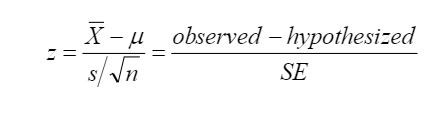

<span class="girk">**EXERCISE 1:**</span>

An assumption for using the z-statistic is that the data be normally distributed, or n be  large  enough.  In  this  case,  n  is  quite  large,  but  nonetheless,  verify  graphically  that  the  data appear  to  come  from  a normal  distribution. 

Do  this  by  plotting a histogram  and overlaying  the density function of an appropriate normal distribution. Also use the function ```qqnorm( )``` which will compare the empirical quantiles of the data set with those expected from a normal distribution. If the  points  fall  along  a line  (you can  use  ```qqline( )```  to  add  such  a  line),  then  the  distribution  is approximately normal. Does the distribution look normal?

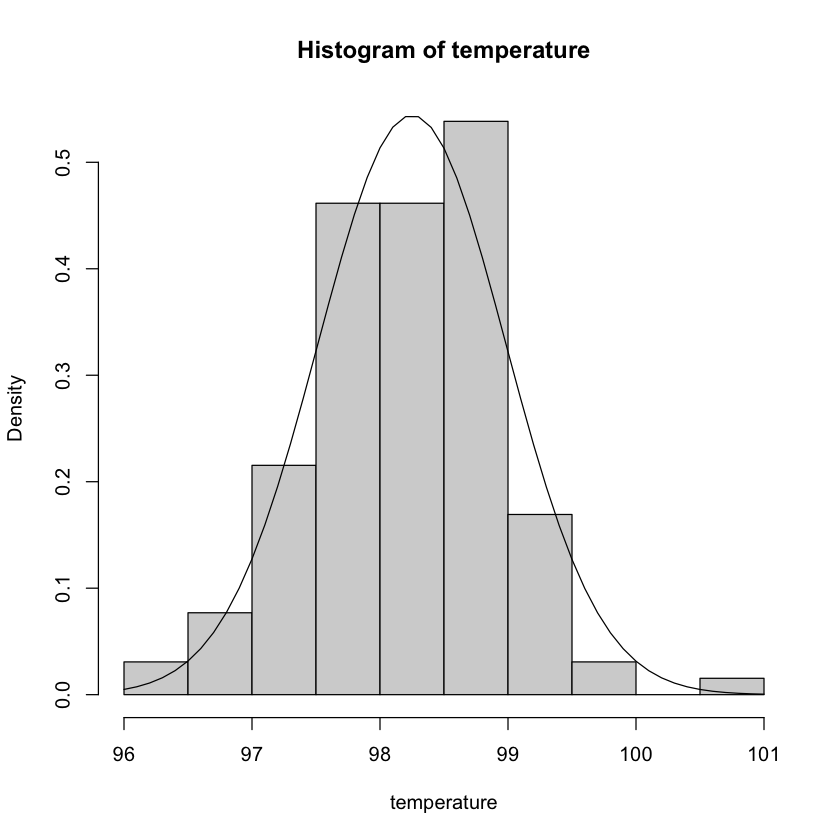

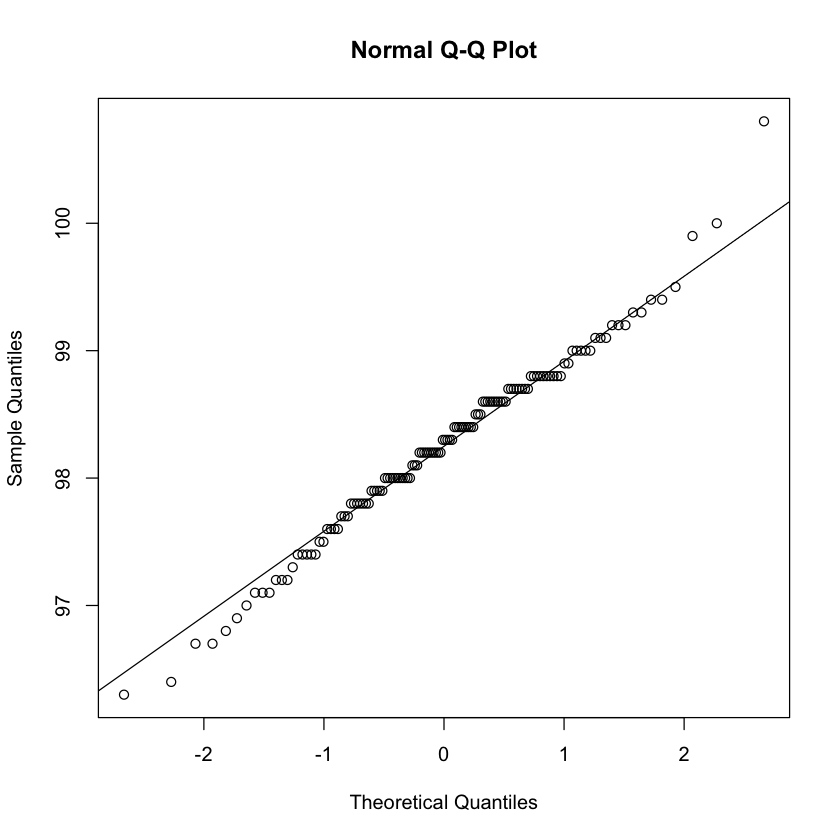

In [2]:
hist(temperature,prob=T)
xbar.temp=mean(temperature)
s.temp=sd(temperature)
x.temp=seq(from=96, to=101, by=0.1)
y.temp=dnorm(x.temp,mean=xbar.temp,sd=s.temp)
lines(y.temp~x.temp)

qqnorm(temperature)
qqline(temperature)

#Based on the histogram and also from the qq plot, 
#the distribution seems to be close to normal, but not very close.

<span class="girk">**EXERCISE 2:**</span>

Calculate the z-score for the measured mean body temperature and determine the p-value to test the null hypothesis given above. You can obtain a p-value from a z-score in R using the function ```pnorm(z)``` or ```1-pnorm(z)```. Do you reject or fail to reject the null hypothesis?

In [3]:
mu.temp=98.6
z.temp=(xbar.temp-mu.temp)/(s.temp/sqrt(length(temperature)))
pval=pnorm(z.temp)*2

pval

#The pval = 4.902157e-08 is very low. Much lower than 1%.
#So we can reject the null hypothesis at 5%, 1%, 0.1% etc. significance levels.

[1] 4.902157e-08

<span class="girk">**EXERCISE 3:**</span>

Alternatively,  one  can  find  the  critical  value(s)  for  this  problem  for  a  specified significance level α. For this problem, the critical values correspond to having (α/2)*100% of the area to the left of the lower critical value and (α/2)*100% to the right of the upper critical value. That  is,  for  a  5%  significance  level,  the  critical  values  are  the  0.025  and  0.975  quantiles  of  the normal distribution. Find the lower and upper critical values for the hypothesis test described above with α = 5% using the function qnorm(). Comparing the sample mean with the critical values, what conclusion can you draw? Is the observed mean within these bounds?

In [4]:
low.crit=mu.temp+qnorm(0.025)*(s.temp/sqrt(length(temperature)))
high.crit=mu.temp+qnorm(0.975)*(s.temp/sqrt(length(temperature)))

#low.crit=98.47397 and high.crit=98.72603.
#But xbar.temp=98.24923 is significantly below low.crit.
#So we reject the null hypothesis at 5% significance level.

<span class="girk">**EXERCISE 4:**</span>

For this type of hypothesis test, there exists a function in R to do all of the work for you. It is called t.test(  ) (recall that you can use a t-test even for large sample sizes, for the t-distribution converges on the normal distribution when n is large). To use the function t.test( ), one must specify the data (temperature) as the first argument, the null hypothesis (mu=98.6) as another argument, and the alternate hypothesis (alt="two.sided") as a third argument. The function returns the observed value of t, the degrees of freedom, the p-value and more. How do the results of t.test() compare to the results you obtained “manually” in question 2 above? Do they match? Why or why not?


In [5]:
t.test(temperature, mu = 98.6, alt = "two.sided")

#They do not match precisely. We get a p value of 2.411e-07 while we got 4.902157e-08 earlier, which is much lower.
#Note that these values are extremely close to each other.
#The p value for the t test is higher than that of the z test, 
#which is as expected due to the fatter tail of the t distribution compared to z distribution.


	One Sample t-test

data:  temperature
t = -5.4548, df = 129, p-value = 2.411e-07
alternative hypothesis: true mean is not equal to 98.6
95 percent confidence interval:
 98.12200 98.37646
sample estimates:
mean of x 
 98.24923 


---

Note that the alternate hypothesis may be specified three ways to the t.testfunction: 

H1 :μ < $μ_O$ is specified with alt="less"

H1 : μ > $μ_O$ is specified with alt="greater"

H1 : μ ≠ $μ_O$ is specified with alt="two.sided".

---

# Afterword

## Paired data

If you view a summary of the fatdata using ```summary(fat)```, you will  see that the hip and chest measurement  are  very  similar  to  one  another. Can  we  conclude  that  they  are significantly different? Let’s see...

Use  the  function ```t.test()``` to  determine  whether  the  population  means  of hip and chest measurements  are  significantly  different from  one  another. ```t.test()``` also reports  a  confidence interval. For this case, what is the meaning of the reported confidence interval?  What happens if you reverse the order of the variables in the function call?

Would  you  expect  the  hip  and  chest  sizes  of  people  to  be  correlated  across  the  population? Create  a  bivariate  scatterplot  of  these  two variables  to  find  out.  Does  there  appear  to  be  a relationship? Are they negatively or positively correlated? A positive  correlation  between  two  variables  can  reduce  the width  of  the confidence  interval about their difference when the data are appropriately paired. It will also lead to a more powerful hypothesis test. Perform  a  one-sample  t-test  on  the  difference  between hip and chestmeasurements. (This corresponds to “pairing” the data by person.) What is the confidence interval now? Can you now conclude that hip and chest measurements are significantly different from one another? Which do you think is the right way to analyze the data? 


## Testing population proportions 

We may also be interested in testing hypotheses concerning population proportions. To do this, we can use the ```prop.test()``` function in R. Read about ```prop.test( )``` in the Help menu by typing ```?prop.test``` . 